# Iris flower segmentation with Cluster Analysis
We will try to perform cluster analysis of the iris flower data set using k-means clustering. 

The iris flower have four different features: sepal length, sepal width, petal length and petal width.

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [2]:
data = pd.read_csv('iris-dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plot the data
Let us look at the shape of the sepal and the petal.

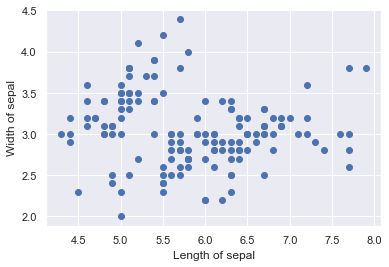

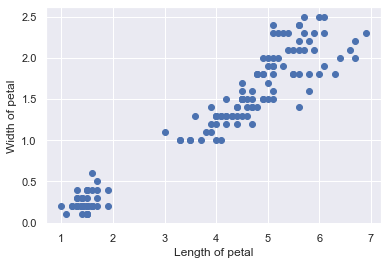

In [3]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('Length of petal')
plt.ylabel('Width of petal')
plt.show()

Looking at the data, it certainly appers to be at least two clusters.

### Scale the variables

In [4]:
from sklearn import preprocessing

x = preprocessing.scale(data)

### Initial clustering
Cluster the data into two clusters

In [5]:
kmeans = KMeans(2,n_init=10)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10)

In [6]:
clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

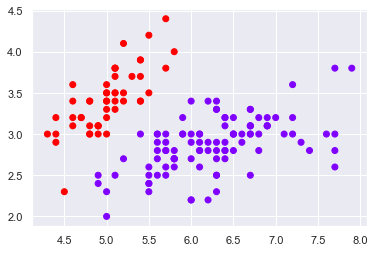

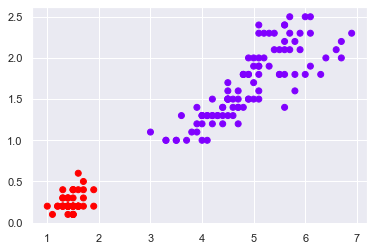

In [7]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'], c=clusters['cluster_pred'], cmap = 'rainbow')
plt.show()
plt.scatter(clusters['petal_length'],clusters['petal_width'], c=clusters['cluster_pred'], cmap = 'rainbow')
plt.show()

It certainly looks like two separate clusters. Let us use the elbow method to evaluate how many clusters there may be.

### WCSS

In [8]:
wcss = []

cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i, n_init=10)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676348,
 140.96837895511078,
 114.3921058273343,
 91.13730688271085,
 80.19193905518794,
 71.31982095188795,
 62.69518214353739,
 56.10070683151381]

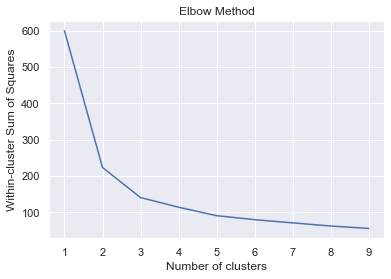

In [9]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Two, three and five clusters certainly seem to be the most likely candidates. Let us evaluate latter two since we already checked the first one.

### 3 clusters

In [10]:
kmeans = KMeans(3,n_init=10)
kmeans.fit(x)

clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

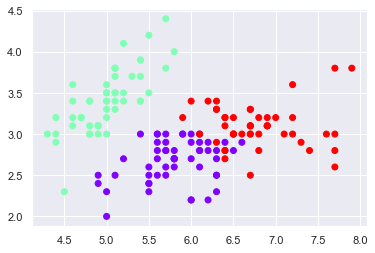

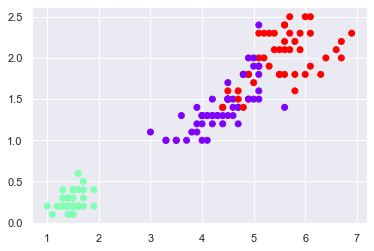

In [11]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.show()
plt.scatter(clusters['petal_length'],clusters['petal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.show()

### 5 clusters

In [12]:
kmeans = KMeans(5,n_init=10)
kmeans.fit(x)

clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

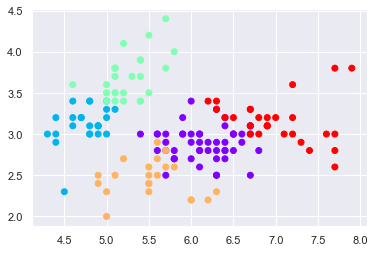

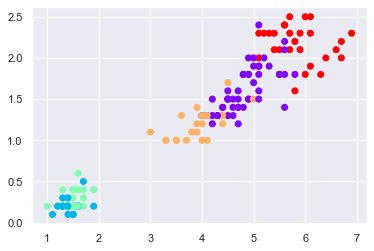

In [13]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.show()
plt.scatter(clusters['petal_length'],clusters['petal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.show()

## Compare to original iris dataset
Let us look at the original dataset and see how our clustering fared in comparison. The actual dataset only contains three types, as it is the actual number of species.

In [14]:
data_with_answers = pd.read_csv('iris-with-answers.csv')
data_with_answers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
x_with_answers = data_with_answers.copy()
x_with_answers['species'] = x_with_answers['species'].map({'setosa':0,'versicolor':1,'virginica':2})
x_with_answers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


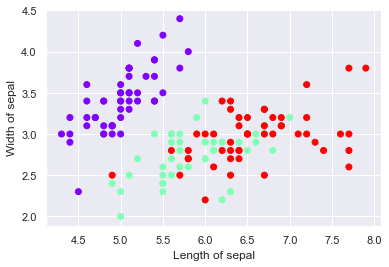

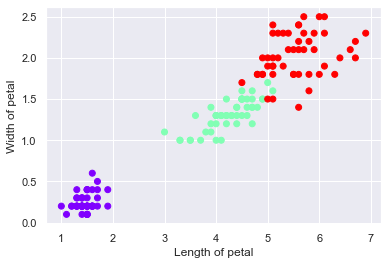

In [16]:
plt.scatter(x_with_answers['sepal_length'],x_with_answers['sepal_width'],c=x_with_answers['species'],cmap='rainbow')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()
plt.scatter(x_with_answers['petal_length'],x_with_answers['petal_width'],c=x_with_answers['species'],cmap='rainbow')
plt.xlabel('Length of petal')
plt.ylabel('Width of petal')
plt.show()

In both our 3 cluster set and the real data set we can see the one separate cluster has been identified in both. What is interesting is that the k-means clustering seems to separate more based on the sepal difference while the actual species have a greater overlap in sepal difference and are more separated based on petal differences. 